# How successful are Black Friday Sales for the e-commerce sector ? 

## Importing Libraries & Datasets

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import statistics as stat
import datetime
from scipy.stats import ttest_1samp

 ### Data Schema

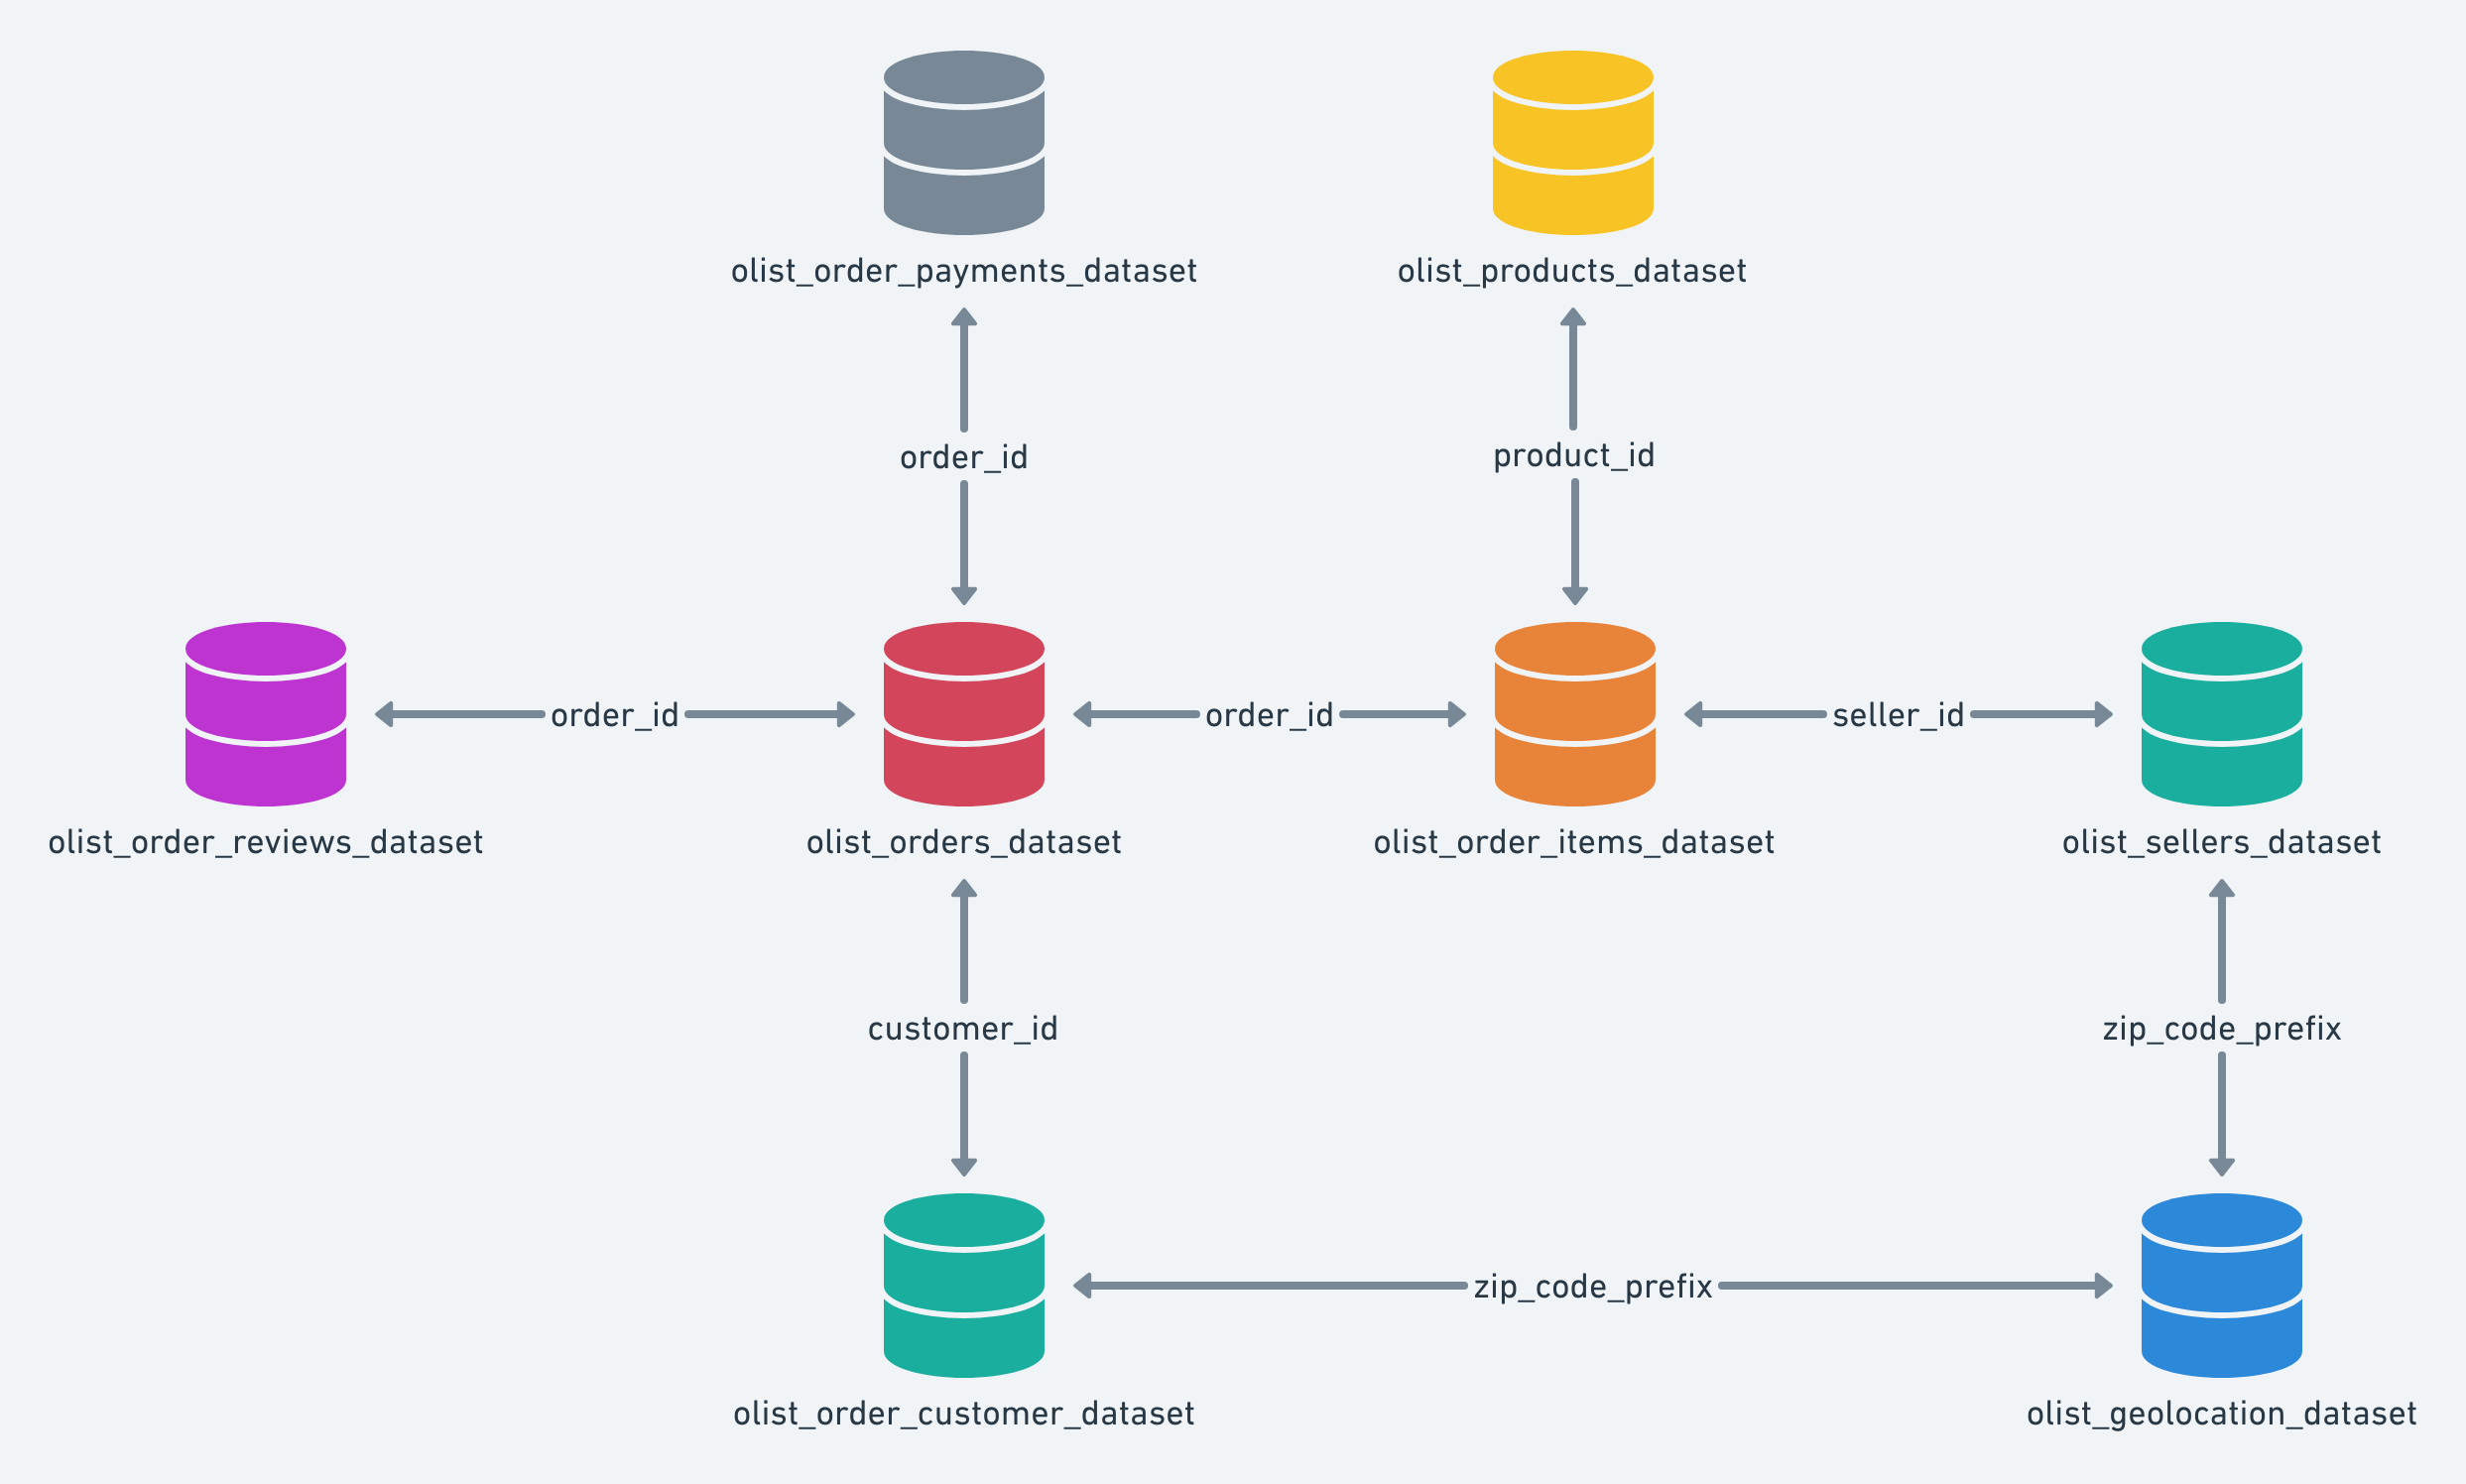

In [2]:
Image(r'/Users/larag/Documents/Ironhack/mid-term-project/data_schema.png')

### Importing OLIST datasets 

#### Main Dataset

In [3]:
df_orders = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_orders_dataset.csv')

#### Add ons

In [4]:
# This dataset includes data about items purchased within each order.                        
df_order_items = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_order_items_dataset.csv')
                            
# This dataset includes data about payment options.                          
df_order_payments = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_order_payments_dataset.csv')  
                               
# This dataset includes data about customer reviews.                            
df_order_reviews = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_order_reviews_dataset.csv')

# This dataset includes data about products sold.
df_products = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_products_dataset.csv')                              
                              
# Translates the product category name to english.
df_category_name_translation = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/product_category_name_translation.csv')

# This dataset contains Brazilian zip codes and lat/lng coordinates.
df_geolocation = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_geolocation_dataset.csv')

# This dataset has information about customer and their location.
df_customers = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_customers_dataset.csv')
                               
# This dataset includes data about sellers.                              
df_sellers = pd.read_csv(r'/Users/larag/Documents/Ironhack/mid-term-project/csv files/original datasets (kaggle)/olist_sellers_dataset.csv')

#### Creating a new product dataframe in english

In [5]:
display(df_products.head())
display(df_category_name_translation.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
df_products_en = pd.merge(df_products, df_category_name_translation, how = 'left' , on = 'product_category_name')

In [7]:
df_products_en.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [8]:
df_products_en = df_products_en[df_products_en['product_category_name'].isna()==False]

In [9]:
df_products_en.isna().sum()

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
product_category_name_english    13
dtype: int64

In [10]:
df_products_en = df_products_en[df_products_en['product_weight_g'].isna()==False]

In [11]:
df_products_en[df_products_en['product_category_name_english'].isna()==True]['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

For above product categories, no translation is provided. Replacing null values with english translation - using google translate and some help of Joana :) 

In [12]:
nan_1 = df_products_en[df_products_en['product_category_name'
                                     ] == 'portateis_cozinha_e_preparadores_de_alimentos'
                      ]['product_category_name_english']

nan_2 = df_products_en[df_products_en['product_category_name'] == 'pc_gamer'][
    'product_category_name_english']


df_products_en.loc[nan_1.index,'product_category_name_english'] = 'kitchen_and_food_preparation_equipment' 

df_products_en.loc[nan_2.index, 'product_category_name_english'] = 'pc_gamer' 

In [13]:
df_products_en = df_products_en.drop(labels = 'product_category_name', axis = 1)

df_products_en.rename(columns={'product_category_name_english': 'product_category_name'},inplace=True)

In [14]:
df_products_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_name_lenght         32340 non-null  float64
 2   product_description_lenght  32340 non-null  float64
 3   product_photos_qty          32340 non-null  float64
 4   product_weight_g            32340 non-null  float64
 5   product_length_cm           32340 non-null  float64
 6   product_height_cm           32340 non-null  float64
 7   product_width_cm            32340 non-null  float64
 8   product_category_name       32340 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.5+ MB


In [15]:
df_products_en.head().T

,0,1,2,3,4
product_id,1e9e8ef04dbcff4541ed26657ea517e5,3aa071139cb16b67ca9e5dea641aaa2f,96bd76ec8810374ed1b65e291975717f,cef67bcfe19066a932b7673e239eb23d,9dc1a7de274444849c219cff195d0b71
product_name_lenght,40.0,44.0,46.0,27.0,37.0
product_description_lenght,287.0,276.0,250.0,261.0,402.0
product_photos_qty,1.0,1.0,1.0,1.0,4.0
product_weight_g,225.0,1000.0,154.0,371.0,625.0
product_length_cm,16.0,30.0,18.0,26.0,20.0
product_height_cm,10.0,18.0,9.0,4.0,17.0
product_width_cm,14.0,20.0,15.0,26.0,13.0
product_category_name,perfumery,art,sports_leisure,baby,housewares


## Cleaning main dataset

In [16]:
def overview(df):
    
    print('Shape {}'.format(df.shape))
    print('')
    print(df.info())
    print('')
    print('Null values:\n',df.isnull().sum())
    
    return df.head()

In [17]:
overview(df_orders)

Shape (99441, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Null values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Could be interesting to have a closer look at timedate columns, e.g. are there delays due to potentially higher
order volumen on Black Friday.

In [18]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], 
                                                       errors='coerce').dt.date

df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], errors='coerce').dt.date

df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], 
                                                           errors='coerce').dt.date

df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], 
                                                           errors='coerce').dt.date

df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], 
                                                           errors='coerce').dt.date

Generally speaking, order approval follows shortly after order purchase. Thus, missing values within the order_approved_at column will be replaced with the the timestamp of the order purchase. 

In [19]:
df_orders['order_approved_at'] = df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'])

In [20]:
display('Percent missing:', df_orders['order_delivered_customer_date'].isnull().
         sum() / len(df_orders['order_delivered_customer_date']) * 100)

display('Percent arrived before estimated delivery:', sum(df_orders['order_estimated_delivery_date'] > 
    df_orders['order_delivered_customer_date']) / len(df_orders['order_estimated_delivery_date']) * 100)

'Percent missing:'

2.981667521444877

'Percent arrived before estimated delivery:'

89.14733359479492

Only about 10% of all orders arrive later than estimated. Thus, missing values within the order_delivered_customer_date column will be replaced with the the estimated delivery date.

In [21]:
df_orders['order_delivered_customer_date'] = df_orders['order_delivered_customer_date'].fillna(
    df_orders['order_estimated_delivery_date'])

In [22]:
(df_orders['order_delivered_carrier_date'] - df_orders['order_approved_at']).dt.days.value_counts()

 1.0      28520
 2.0      16879
 0.0      15187
 3.0      12130
 4.0       7787
          ...  
 56.0         1
 61.0         1
-171.0        1
 126.0        1
 64.0         1
Length: 70, dtype: int64

In [23]:
# Replacing missing valus of order_delivered_carrier_date column with the mode:

df_orders['order_delivered_carrier_date'] = df_orders['order_delivered_carrier_date'
                                                     ].fillna(df_orders['order_approved_at'] + 
                                                              datetime.timedelta(days=1))

In [24]:
df_orders = df_orders.rename({'order_purchase_timestamp': 'order_purchase_date'}, axis=1) 

In [25]:
overview(df_orders)

Shape (99441, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_date            99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Null values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_date              0
order_approved_at                0
order_delivered_carrier_date     0
order_delivere

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


## Exploring additional datasets

### Order items

In [26]:
overview(df_order_items)

Shape (112650, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Null values:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


At a first glance, data looks fine. As of now, no in depth analysis needed.

### Order Payments

In [27]:
overview(df_order_payments)

Shape (103886, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Null values:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


At a first glance, data looks fine. As of now, no in depth analysis needed.

### Order reviews

In [28]:
overview(df_order_reviews)

Shape (99224, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Null values:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Wrt evaluating the success of Black Friday Sales, customer satisfaction could be an interesting feature - looking at absolute scores of orders placed on Black Fridays as well scores of orders placed on Black Fridays relative to all other scores (overall and for each product category). As this is the only coulumn of interest, review score will be included in df_orders. 

In [29]:
df_orders = pd.merge(df_orders, df_order_reviews[['order_id','review_score']
                                                ], on = 'order_id', how = 'left')

In [30]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,5.0


In [31]:
df_orders.isna().sum()/len(df_orders)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_date              0.000000
order_approved_at                0.000000
order_delivered_carrier_date     0.000000
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
review_score                     0.007681
dtype: float64

In [32]:
df_orders = df_orders[df_orders['review_score'].isna()==False]

### Products

In [33]:
overview(df_products_en)

Shape (32340, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_name_lenght         32340 non-null  float64
 2   product_description_lenght  32340 non-null  float64
 3   product_photos_qty          32340 non-null  float64
 4   product_weight_g            32340 non-null  float64
 5   product_length_cm           32340 non-null  float64
 6   product_height_cm           32340 non-null  float64
 7   product_width_cm            32340 non-null  float64
 8   product_category_name       32340 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.5+ MB
None

Null values:
 product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


A closer look at product category might be interesting as there might be differences among product categories in Black Friday Sales. As this is the only coulumn of interest, prodcut category name will be included in df_order_items.

In [34]:
df_order_items = pd.merge(df_order_items, df_products_en[['product_id','product_category_name']], 
                          on = 'product_id', how = 'left')

### Geolocation

In [35]:
overview(df_geolocation)

Shape (1000163, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Null values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [36]:
# Strikingly many entries compared to other datasets. Thus, checking for unique values:

df_geolocation['geolocation_zip_code_prefix'].nunique()

19015

In [37]:
# Dropping duplicates to reduce storage space. 

df_geolocation.drop_duplicates(subset = 'geolocation_zip_code_prefix', keep = 'first', inplace = True)

No further cleaning or investigation of the dataset as distance between seller and customer is most likely not going to be relevant for my analysis. It might, however, be interesting to check whether or not there are regional differences wrt to Black Friday Sales. Thus, storing names of federal states in a dictionary:

In [38]:
state_mapping = {'AC': 'Acre', 
                 'AL': 'Alagoas',
                 'AP': 'Amapá',
                 'AM': 'Amazonas',
                 'BA': 'Bahia',
                 'DF': 'Brasília',
                 'CE': 'Ceará',
                 'ES': 'Espírito Santo',
                 'GO': 'Goiás',
                 'MT': 'Mato Grosso',
                 'MS': 'Mato Grosso do Sul',
                 'MA': 'Maranhão',
                 'MG': 'Minas Gerais',
                 'PA': 'Pará',
                 'PR': 'Paraná',
                 'PB': 'Paraíba',
                 'PE': 'Pernambuco', 
                 'PI': 'Piauí',
                 'RJ': 'Rio de Janeiro', 
                 'RN': 'Rio Grande do Norte', 
                 'RS': 'Rio Grande do Sul', 
                 'RO': 'Rondônia', 
                 'RR': 'Roraima', 
                 'SC': 'Santa Catarina', 
                 'SP': 'São Paulo', 
                 'SE': 'Sergipe', 
                 'TO': 'Tocantins'
                }

### Customers

In [39]:
overview(df_customers)

Shape (99441, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Null values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


At a first glance, data looks fine. As of now, no in depth analysis needed.

###  Sellers

In [40]:
overview(df_sellers)

Shape (3095, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Null values:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


At a first glance, data looks fine. As of now, no in depth analysis needed. 

## Storing cleaned datasets in SQL (incl. csv files)

In [41]:
import pymysql
from sqlalchemy import create_engine
import getpass

In [42]:
password = getpass.getpass()

········


In [43]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/olist'
engine = create_engine(connection_string)

#### Adding main dataset:

In [44]:
df_orders.to_sql('orders', if_exists = 'replace', con = engine, index=False)

#### Adding add ons:

In [45]:
df_order_items.to_sql('order_items', if_exists = 'replace', con = engine, index=False)

In [46]:
df_order_payments.to_sql('order_payments', if_exists = 'replace', con = engine, index=False)

In [47]:
df_sellers.to_sql('sellers', if_exists = 'replace', con = engine, index=False)

In [48]:
df_customers.to_sql('customers', if_exists = 'replace', con = engine, index=False)

In [49]:
df_geolocation.to_sql('geolocation', if_exists = 'replace', con = engine, index=False)

### Storting cleaned data sets to csv

In [50]:
df_orders.to_csv('df_orders.csv')

In [51]:
df_order_items.to_csv('df_order_items.csv')

In [52]:
df_order_payments.to_csv('df_order_payments.csv')

In [53]:
df_sellers.to_csv('df_sellers.csv')

In [54]:
df_customers.to_csv('df_customers.csv')

In [55]:
df_geolocation.to_csv('df_geolocation.csv')

## Extracting Information from SQL  

In 2017, Black Friday (bf) was on the 24th of November and Cyber Monday (cm) on the 27th of November. 

In [56]:
df_17 = pd.read_sql_query('''SELECT o.order_purchase_date,

                                CASE WHEN o.order_purchase_date LIKE '2017-11-24' then 1 
                                else 0 end as bf_flag,
                                
                                CASE WHEN o.order_purchase_date LIKE '2017-11-27' then 1 
                                else 0 end as cm_flag,
                                
                                CASE WHEN EXTRACT(week from o.order_purchase_date) IN (47,48) then 1 
                                else 0 end as bf_cm_w_flag,
                                
                                EXTRACT(week from o.order_purchase_date) as week,
                                
                                oi.product_category_name as product_category,
                                oi.price,
                                op.payment_type,
                                op.payment_installments,
                                o.review_score,
                                s.seller_city,
                                s.seller_state
                                
                                FROM olist.orders o 
                                
                                LEFT JOIN olist.order_items oi 
                                ON oi.order_id = o.order_id
                                
                                LEFT JOIN olist.order_payments op
                                ON op.order_id = oi.order_id
                                
                                LEFT JOIN olist.sellers s
                                ON s.seller_id = oi.seller_id
                                
                                WHERE o.order_purchase_date LIKE '2017-%%'
                                '''
                          ,engine)

In [57]:
overview(df_17)

Shape (53999, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53999 entries, 0 to 53998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_purchase_date   53999 non-null  object 
 1   bf_flag               53999 non-null  int64  
 2   cm_flag               53999 non-null  int64  
 3   bf_cm_w_flag          53999 non-null  int64  
 4   week                  53999 non-null  int64  
 5   product_category      52511 non-null  object 
 6   price                 53488 non-null  float64
 7   payment_type          53488 non-null  object 
 8   payment_installments  53488 non-null  float64
 9   review_score          53999 non-null  float64
 10  seller_city           53488 non-null  object 
 11  seller_state          53488 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 4.9+ MB
None

Null values:
 order_purchase_date        0
bf_flag                    0
cm_flag           

,order_purchase_date,bf_flag,cm_flag,bf_cm_w_flag,week,product_category,price,payment_type,payment_installments,review_score,seller_city,seller_state
0,2017-07-18,0,0,0,29,office_furniture,119.94,credit_card,4.0,1.0,itaquaquecetuba,SP
1,2017-08-06,0,0,0,32,furniture_decor,75.00,credit_card,4.0,5.0,sao paulo,SP
2,2017-08-06,0,0,0,32,furniture_decor,75.00,credit_card,4.0,5.0,sao paulo,SP
3,2017-10-15,0,0,0,42,telephony,49.90,boleto,1.0,1.0,sao paulo,SP
4,2017-04-25,0,0,0,17,sports_leisure,19.33,credit_card,1.0,3.0,sorocaba,SP


In [58]:
round((df_17['product_category'].isna()==True).sum()/len(df_17['product_category'])*100,2)

2.76

In [59]:
# Due to the relatively small number, dropping Nan:

df_17 = df_17[df_17['product_category'].isna()==False]

overview(df_17)

Shape (52511, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52511 entries, 0 to 53487
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_purchase_date   52511 non-null  object 
 1   bf_flag               52511 non-null  int64  
 2   cm_flag               52511 non-null  int64  
 3   bf_cm_w_flag          52511 non-null  int64  
 4   week                  52511 non-null  int64  
 5   product_category      52511 non-null  object 
 6   price                 52511 non-null  float64
 7   payment_type          52511 non-null  object 
 8   payment_installments  52511 non-null  float64
 9   review_score          52511 non-null  float64
 10  seller_city           52511 non-null  object 
 11  seller_state          52511 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 5.2+ MB
None

Null values:
 order_purchase_date     0
bf_flag                 0
cm_flag                 

,order_purchase_date,bf_flag,cm_flag,bf_cm_w_flag,week,product_category,price,payment_type,payment_installments,review_score,seller_city,seller_state
0,2017-07-18,0,0,0,29,office_furniture,119.94,credit_card,4.0,1.0,itaquaquecetuba,SP
1,2017-08-06,0,0,0,32,furniture_decor,75.00,credit_card,4.0,5.0,sao paulo,SP
2,2017-08-06,0,0,0,32,furniture_decor,75.00,credit_card,4.0,5.0,sao paulo,SP
3,2017-10-15,0,0,0,42,telephony,49.90,boleto,1.0,1.0,sao paulo,SP
4,2017-04-25,0,0,0,17,sports_leisure,19.33,credit_card,1.0,3.0,sorocaba,SP


## Overall

### Looking at sales:

In [60]:
total_sales = df_17['price'].agg(sum)
round(total_sales) 

6340857

In [61]:
df_sal = df_17.groupby('order_purchase_date').sum().reset_index(
    drop = False).sort_values('price', ascending = False)[['order_purchase_date',
                                                    'price', 
                                                    'bf_flag',
                                                    'cm_flag',
                                                    'bf_cm_w_flag']].rename(
    columns={'price':'sales'})

top10_sal = df_sal.head(10)

top10_sal['%_total_sales'] = round(top10_sal['sales']/ total_sales*100,2)

top10_sal

<ipython-input-61-d58577a7757c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_sal['%_total_sales'] = round(top10_sal['sales']/ total_sales*100,2)


,order_purchase_date,sales,bf_flag,cm_flag,bf_cm_w_flag,%_total_sales
323,2017-11-24,155811.65,1398,0,1398,2.46
324,2017-11-25,65885.44,0,0,624,1.04
326,2017-11-27,49662.21,0,495,495,0.78
327,2017-11-28,48482.16,0,0,441,0.76
322,2017-11-23,47096.86,0,0,346,0.74
325,2017-11-26,46862.87,0,0,468,0.74
333,2017-12-04,46348.20,0,0,0,0.73
319,2017-11-20,44165.22,0,0,262,0.70
330,2017-12-01,41417.48,0,0,336,0.65
328,2017-11-29,40319.44,0,0,370,0.64


#### Key findings:

1. Black Friday is the best selling day of the year. 
2. The day after Black Friday is the second best selling day of the year.

3. Cyber Monday is the third best selling day of the year. 
4. The day after Cyber Monday is the next best selling day of the year. 
 
5. Thanksgiving to the day after Cyber Monday is the period with the strongest sales of the year (these 6 days will be referred to as 'sales week').

In [62]:
top10_sal.to_csv('top10_sal.csv')

In [63]:
print('Percentage of total sales made in Sales week:', round(
    top10_sal['sales'].head(6).sum()/total_sales*100,2),'%')

print('Percentage of sales made in BF Week + CM Week:', round(
    df_17.query('bf_cm_w_flag == 1').sum()['price']/total_sales*100,2),'%')

Percentage of total sales made in Sales week: 6.53 %
Percentage of sales made in BF Week + CM Week: 10.76 %


#### Creating bf & cm variables:

In [64]:
bf_sales = df_17.query('bf_flag == 1').sum()['price']

cm_sales = df_17.query('cm_flag == 1').sum()['price']

sw_sales = top10_sal['sales'].head(6).sum()

bf_cm_w_sales = df_17.query('bf_cm_w_flag == 1').sum()['price']

print('Black Friday Sales:', bf_sales)
print('Cyber Monday Sales:', cm_sales)
print('Sales Week Sales:', sw_sales)
print('Sales made in Black Friday Week and Cyber Monday Week:', bf_cm_w_sales)

Black Friday Sales: 155811.65
Cyber Monday Sales: 49662.21
Sales Week Sales: 413801.18999999954
Sales made in Black Friday Week and Cyber Monday Week: 682230.04


## Hypothesis testing 

Ho: The total sales on an average day are not different than the total sales on Black Friday.

H1: The total sales on an average day are different than the total sales on Black Friday.

In [65]:
excl_bf_sales = list(df_sal['sales'].sort_values(ascending=False))[1:]

black_friday_sales = max(df_sal['sales'])

In [66]:
stat, pval = ttest_1samp(excl_bf_sales, black_friday_sales, alternative='two-sided') 

print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

stat is   -295.321724902977
pvalue for the two-tailed test is  0.0


Ho can be rejected. The daily sales are on average much lower than on BF. 

### Looking at number of orders:

In [67]:
total_no = df_17['price'].agg('count')

total_no

52511

In [68]:
top10_no = df_17.groupby('order_purchase_date').count().reset_index(
    drop = False).sort_values('price', ascending = False).head(10)[
    ['order_purchase_date','price']].rename(columns={'price':'no_of_orders'})

top10_no['%_total_orders'] = round(top10_no['no_of_orders']/ total_no*100,2)

top10_no

,order_purchase_date,no_of_orders,%_total_orders
323,2017-11-24,1398,2.66
324,2017-11-25,624,1.19
326,2017-11-27,495,0.94
325,2017-11-26,468,0.89
327,2017-11-28,441,0.84
328,2017-11-29,370,0.70
333,2017-12-04,361,0.69
322,2017-11-23,346,0.66
330,2017-12-01,336,0.64
334,2017-12-05,324,0.62


In [69]:
print('Percentage of total orders made in Sales week:', round(
    top10_no['no_of_orders'].head(6).sum()/ total_no*100,2),'%')

print('Percentage of total orders made in BF Week + CM Week:', round(
    df_17.query('bf_cm_w_flag == 1').count()['price']/total_no*100,2),'%')

Percentage of total orders made in Sales week: 7.23 %
Percentage of total orders made in BF Week + CM Week: 11.34 %


#### Creating bf & cm variables:

In [70]:
bf_no = df_17.query('bf_flag == 1').count()['price']

cm_no = df_17.query('cm_flag == 1').count()['price']

sw_no = top10_no['no_of_orders'].head(6).sum()

bf_cm_w_no = df_17.query('bf_cm_w_flag == 1').count()['price']

print('Number of orders placed on Black Friday:', bf_no)
print('Number of orders placed on Cyber Monday:', cm_no)
print('Number of orders placed within Sales Week:', sw_no)
print('Number of orders placed within the week of Black Friday and Cyber Monday:', bf_cm_w_no)

Number of orders placed on Black Friday: 1398
Number of orders placed on Cyber Monday: 495
Number of orders placed within Sales Week: 3796
Number of orders placed within the week of Black Friday and Cyber Monday: 5956


### Are there regional differences ? 

In [71]:
display(df_17['seller_state'].nunique())
display(df_17['seller_state'].unique())

20

array(['SP', 'RJ', 'PR', 'BA', 'MG', 'SC', 'DF', 'RS', 'CE', 'ES', 'GO',
       'MS', 'PA', 'RN', 'PE', 'SE', 'RO', 'MT', 'PB', 'AM'], dtype=object)

#### Looking at sales:

In [72]:
sales_reg = df_17.groupby(['seller_state','order_purchase_date']).sum().reset_index(
    drop = False).sort_values('price', ascending = False)[['seller_state',
                                                           'order_purchase_date', 
                                                           'price', 
                                                           'bf_flag', 
                                                           'cm_flag']]

sales_reg['marketshare_total'] = round(sales_reg['price']/total_sales*100,2)

sales_reg

,seller_state,order_purchase_date,price,bf_flag,cm_flag,marketshare_total
2879,SP,2017-11-24,92442.82,1019,0,1.46
2880,SP,2017-11-25,37104.85,0,0,0.59
2875,SP,2017-11-20,32392.43,0,0,0.51
2881,SP,2017-11-26,31986.74,0,0,0.50
2882,SP,2017-11-27,31714.95,0,346,0.50
...,...,...,...,...,...,...
314,DF,2017-09-03,13.00,0,0,0.00
1149,PE,2017-07-28,12.93,0,0,0.00
252,DF,2017-05-21,9.99,0,0,0.00
1568,RJ,2017-03-09,8.90,0,0,0.00


In [73]:
top_reg_sales = sales_reg.groupby('seller_state').sum().reset_index(
    drop = False).sort_values('price', ascending = False).head(20)[['seller_state', 
                                                                    'marketshare_total', 'price']
                                        ].rename(columns={'price':'total_sales'})

top_reg_sales

,seller_state,marketshare_total,total_sales
19,SP,63.69,4038140.19
12,PR,8.67,544434.33
6,MG,8.23,521967.10
13,RJ,5.37,346634.74
17,SC,5.00,316637.32
1,BA,3.59,232979.83
16,RS,2.53,174997.01
3,DF,0.58,52888.64
5,GO,0.31,31165.79
4,ES,0.13,24282.50


In [74]:
print(top_reg_sales['marketshare_total'].head(5).sum(), '%')
print(top_reg_sales['marketshare_total'].head(3).sum(), '%')

90.95999999999975 %
80.58999999999982 %


#### Key findings (general):

1. In 2017, almost 2/3 of all sales are made by sellers in SP. 
2. More than 80% of all sales are made by sellers in 3 regions. 
3. More than 90% of all sales are made by sellers in 5 regions. 

Thus, looking only at the number of orders for the top 5 selling-regions.

In [75]:
top_reg_sales.to_csv('top_reg_sales.csv')

#### Looking at order numbers (top 5 regions)

In [76]:
no_reg = df_17.groupby(['seller_state']).count().reset_index(drop = False).sort_values(
    'price', ascending = False)[['seller_state', 
                                 'price']].rename(columns={'price':'no_orders'})

no_reg['marketshare_no'] = round(no_reg['no_orders']/total_no*100,2)

no_reg.head(5)

,seller_state,no_orders,marketshare_no
19,SP,37125,70.70
6,MG,4861,9.26
12,PR,3674,7.00
17,SC,2159,4.11
13,RJ,1946,3.71


In [77]:
print(no_reg ['marketshare_no'].head(5).sum(), '%')
print(no_reg ['marketshare_no'].head(3).sum(), '%')

94.78 %
86.96000000000001 %


#### Key findings (general):

1. Based on order numbers, the percentage of orders made by sellers in Sao Paolo as well as top 3 region increases by around 7%.
2. For top 5 regions, the percentage increase amounts roughly 5 % to almost 95%. 

Irrespectiv of the base, most sellers are located in Sao Paolo. 

In [78]:
no_reg.to_csv('no_reg.csv')

#### Looking at BF and CM Sales in Sao Paolo: 

In [79]:
display('SP Market share base on total sales in 2017: 63.69 %')
print('Black Friday:',round(92442.82/bf_sales*100,2),'%')
print('Cyber Monday:',round(31714.95/cm_sales*100,2),'%')

'SP Market share base on total sales in 2017: 63.69 %'

Black Friday: 59.33 %
Cyber Monday: 63.86 %


In [80]:
display('SP Market share base on total sales in 2017: 70.70 %')

print('Black Friday:',round(1019/bf_no*100,2),'%')
print('Cyber Monday:',round(346/cm_no*100,2),'%')

'SP Market share base on total sales in 2017: 70.70 %'

Black Friday: 72.89 %
Cyber Monday: 69.9 %


#### Key findings BF & CM sales:

1. The marketshare of Sao Paolo based sellers on CM matches their overall marketshare in 2017 (irrespective if looking at total sales or number of orders)
2. On BF, however, the relative marketshare of sellers based in Sao Paolo increases when looking at number of orders but decreases when looking at total sales. This indicates that Sao Paolo based sellers tend to have more, but relatively smaller orders on BF.

#### Above findings might be due to BF and CM promotions in that no shipping fees might be part of the deal -  looking into freight costs if there is time.

## Expected total sales without BF promotions  

In [81]:
# Visual inspection of sales in 2017: 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

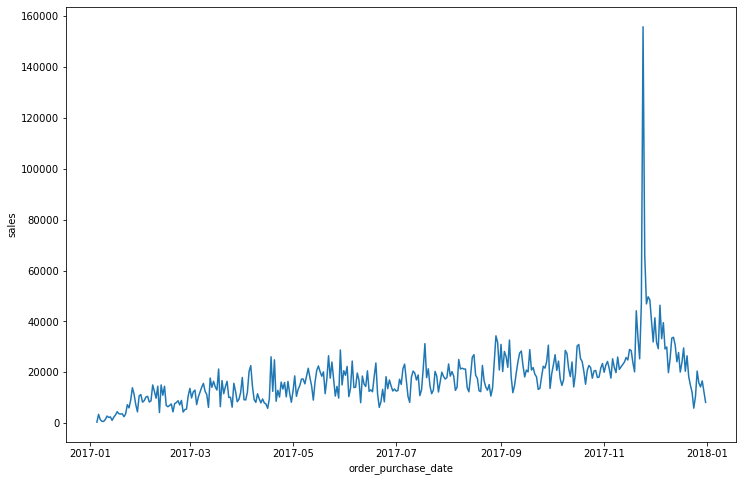

In [82]:
# per day:

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=df_sal,
             x="order_purchase_date",
             y="sales",
             ax=ax);

In [83]:
df_week = pd.read_sql_query('''SELECT 
                                DATE_SUB(DATE(o.order_purchase_date),
                                INTERVAL DAYOFWEEK(DATE(o.order_purchase_date)) - 1 DAY) AS week,
                                SUM(oi.price) as total_sales
                                FROM olist.orders o 
                                LEFT JOIN olist.order_items oi 
                                ON o.order_id = oi.order_id 
                                WHERE o.order_purchase_date > '20170301'
                                AND o.order_purchase_date < '20180331'
                                GROUP BY week
                                ORDER BY week
                                '''
                            ,engine)

In [84]:
df_week

,week,total_sales
0,2017-02-26,35029.15
1,2017-03-05,77507.65
2,2017-03-12,94793.40
3,2017-03-19,85433.90
4,2017-03-26,82271.33
5,2017-04-02,94835.29
6,2017-04-09,62099.90
7,2017-04-16,82176.99
8,2017-04-23,93211.32
9,2017-04-30,92173.62


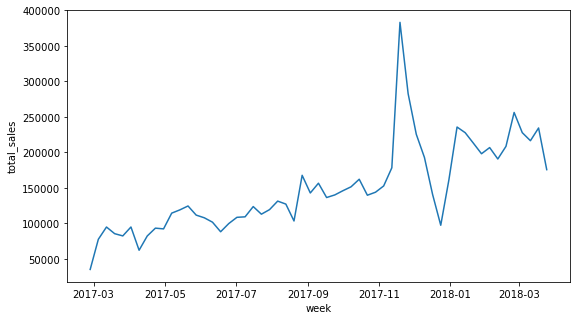

In [85]:
fig, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=df_week,
             x='week',
             y='total_sales',
             ax=ax);

#### Key findings:

1. Overall, total sales tend to increase throughout the year, indicating a positive trend.  
2. Before BF, there is a drop in total sales, indicating that some customers might have postponed their orders.
3. After BF, there is as well a drop in total sales, indicating that customers might have preponed their orders.

## Estimating total sales adjusted for BF promotions

### Trend line prediction using linear regression

In [86]:
df_week['week'] = pd.to_datetime(df_week['week'])

In [87]:
df_trend = df_week.loc[df_week['week'].between('2017-03-05','2017-12-31')].copy(
).reset_index(drop=True)

In [88]:
# Selecting time period for training 
 
df_trend_train = df_trend[df_trend['week'].between("2017-03-05","2017-10-22")].copy(
).reset_index(drop=True)

In [89]:
# Creating time variable

df_trend_train = (df_trend_train.sort_values('week').assign(t=range(1, len(
    df_trend_train) + 1)))

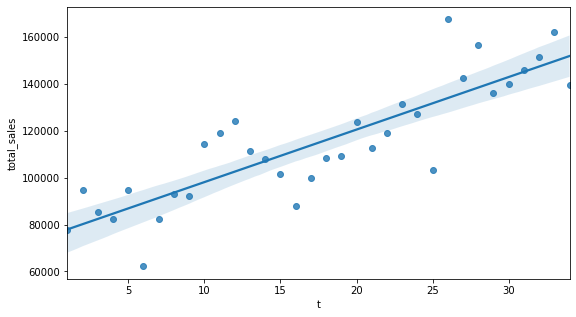

In [90]:
fig, ax = plt.subplots(figsize=(9,5))

sns.regplot(data=df_trend_train,
             x="t",
             y="total_sales",
             ax=ax);

#### Trying to get the fitted line above using simple linear regression:

In [91]:
# add a constant

df_trend_train = df_trend_train.assign(const=1)

In [92]:
# splitting train/test 

y = df_trend_train['total_sales']
X = df_trend_train[['const', 't']]

In [93]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [94]:
lm = linear_model.LinearRegression()
results = lm.fit(X,y)

predictions_sales = results.predict(X)
r2_score(y, predictions_sales)

0.7323726066424783

Using r2 score to evaluate the performance of the simple linear regression model, the model is found to be good enough to continue without further improvements, as it is able to explain almost three quarters of the variation in total sales in 2017. 

In [95]:
df_trend_train = df_trend_train.assign(predictions_sales=predictions_sales)

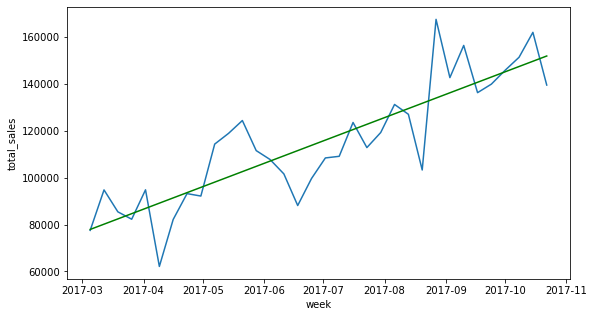

In [96]:
fig, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=df_trend_train, 
             x='week',
             y='total_sales',
             ax=ax);

sns.lineplot(data=df_trend_train,
             x='week',
             y='predictions_sales',
             color="green",
             ax=ax);

Blue line: actual sales within 2017. 

Green line: 'fitted sales line' using simple linear regression model. 

#### Forcasting total sales for time period around Black Friday:

In [97]:
# Adding constant and time variable to df_trend

df_trend = (df_trend.assign(
    const=1, t=range(1, len(df_trend) + 1)))

In [98]:
predictions_bf = results.predict(df_trend[['const', 't']])
df_trend = df_trend.assign(predictions_sales=predictions_bf )

In [99]:
df_trend

,week,total_sales,const,t,predictions_sales
0,2017-03-05,77507.65,1,1,77913.775866
1,2017-03-12,94793.40,1,2,80158.863817
2,2017-03-19,85433.90,1,3,82403.951768
3,2017-03-26,82271.33,1,4,84649.039719
4,2017-04-02,94835.29,1,5,86894.127670
5,2017-04-09,62099.90,1,6,89139.215621
6,2017-04-16,82176.99,1,7,91384.303572
7,2017-04-23,93211.32,1,8,93629.391523
8,2017-04-30,92173.62,1,9,95874.479474
9,2017-05-07,114367.05,1,10,98119.567426


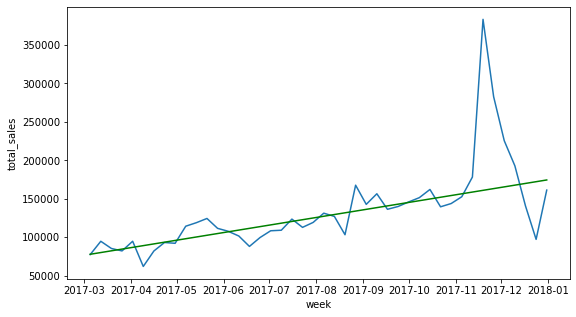

In [100]:
fig, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=df_trend,
             x='week',
             y='total_sales',
             ax=ax);

sns.lineplot(data=df_trend,
             x='week',
             y="predictions_sales",
             color="green",
             ax=ax);

In [101]:
df_trend.to_csv('df_trend.csv')

In [102]:
df_trend

,week,total_sales,const,t,predictions_sales
0,2017-03-05,77507.65,1,1,77913.775866
1,2017-03-12,94793.40,1,2,80158.863817
2,2017-03-19,85433.90,1,3,82403.951768
3,2017-03-26,82271.33,1,4,84649.039719
4,2017-04-02,94835.29,1,5,86894.127670
5,2017-04-09,62099.90,1,6,89139.215621
6,2017-04-16,82176.99,1,7,91384.303572
7,2017-04-23,93211.32,1,8,93629.391523
8,2017-04-30,92173.62,1,9,95874.479474
9,2017-05-07,114367.05,1,10,98119.567426


A simple linear regression model has been used to forecast sales during the time period which is influenced by Black Friday Promotions (a few weeks before and after BF). The sales predicted by the model (i.e. sales that would have been generated without Black Friday Promotions) are plotted in green in above figure. The area between this green line (= sales forecast) and the blue line (= actual sales) indicates an increase in sales due to promotions. 

In [103]:
# Calculating the differences between actual and predicted sales: 

bf_sales = df_trend.loc[df_trend['week'] > '2017-10-22']

bf_sales = bf_sales.assign(delta = bf_sales['total_sales'] - bf_sales['predictions_sales'])

bf_sales

,week,total_sales,const,t,predictions_sales,delta
34,2017-10-29,143834.63,1,35,154246.766203,-10412.136203
35,2017-11-05,152667.01,1,36,156491.854154,-3824.844154
36,2017-11-12,178250.37,1,37,158736.942105,19513.427895
37,2017-11-19,383122.32,1,38,160982.030057,222140.289943
38,2017-11-26,282627.94,1,39,163227.118008,119400.821992
39,2017-12-03,225422.98,1,40,165472.205959,59950.774041
40,2017-12-10,192793.64,1,41,167717.293910,25076.346090
41,2017-12-17,140692.39,1,42,169962.381861,-29269.991861
42,2017-12-24,97279.53,1,43,172207.469812,-74927.939812
43,2017-12-31,161264.54,1,44,174452.557763,-13188.017763


In [104]:
# Getting the delta by summing up weekly differences:

total_delta = round(bf_sales['delta'].sum(),2)

total_delta_perc = round(((bf_sales['total_sales'].sum() / bf_sales['predictions_sales'].sum()) - 1)*100,2)

print('Black Friday (and Cyber Monday) promotions increased the total sales by', total_delta, 'Reais.')
print('This is equivalent to an percentage increase of', total_delta_perc,'%.')

Black Friday (and Cyber Monday) promotions increased the total sales by 314458.73 Reais.
This is equivalent to an percentage increase of 19.13 %.


In [105]:
bf_sales_5 = bf_sales.head(5)
bf_sales_7 = bf_sales.head(7)

total_delta_5 = round(bf_sales_5['delta'].sum(),2)
total_delta_perc_5 = round(((bf_sales_5['total_sales'].sum() / bf_sales_5['predictions_sales'].sum()) - 1)*100,2)

print('Black Friday (and Cyber Monday) promotions increased the total sales by', total_delta_5, 'Reais.')
print('This is equivalent to an percentage increase of', total_delta_perc_5,'%.')

total_delta_7 = round(bf_sales_7['delta'].sum(),2)
total_delta_perc_7 = round(((bf_sales_7['total_sales'].sum() / bf_sales_7['predictions_sales'].sum()) - 1)*100,2)

print('Black Friday (and Cyber Monday) promotions increased the total sales by', total_delta_7, 'Reais.')
print('This is equivalent to an percentage increase of', total_delta_perc_7,'%.')

Black Friday (and Cyber Monday) promotions increased the total sales by 346817.56 Reais.
This is equivalent to an percentage increase of 43.7 %.
Black Friday (and Cyber Monday) promotions increased the total sales by 431844.68 Reais.
This is equivalent to an percentage increase of 38.32 %.


#### The "success" of BF promotions is strongly affected by the selection of the cut-off point / duration of the forecasting period. A more conservative approach might be to look at all remaining weeks (increase in sales: about 20%) whereas a more optimistic approach might be to take the cut-off point in mid-December (increase in sales: about 40%).